<img src="../imgs/python.png" align="left" height="140" width="140"><img src="../imgs/mts.jpeg" align="right" height="140" width="140"><center><h1>Python for Data Analysis MTSBank</h1><h2>NumPy Basics</h2></center>

# Numpy Cheat Sheet
http://www.datasciencefree.com/numpy.pdf

# NumPy Basics: Arrays and Vectorized Computation

NumPy, short for Numerical Python, is the fundamental package required for high
performance scientific computing and data analysis. It is the foundation on which
nearly all of the higher-level tools in this book are built. Here are some of the things it
provides:
1. `ndarray`, a fast and space-efficient multidimensional array providing vectorized
arithmetic operations and sophisticated broadcasting capabilities
2. Standard mathematical functions for fast operations on entire arrays of data
without having to write loops
3. Tools for reading / writing array data to disk and working with memory-mapped
files
4. Linear algebra, random number generation, and Fourier transform capabilities
5. Tools for integrating code written in C, C++, and Fortran

The last bullet point is also one of the most important ones from an ecosystem point
of view. Because NumPy provides an easy-to-use C API, it is very easy to pass data to
external libraries written in a low-level language and also for external libraries to return
data to Python as NumPy arrays. This feature has made Python a language of choice
for wrapping legacy C/C++/Fortran codebases and giving them a dynamic and easyto-use
interface.

While NumPy by itself does not provide very much high-level data analytical functionality,
having an understanding of NumPy arrays and array-oriented computing will
help you use tools like pandas much more effectively. If you’re new to Python and just
looking to get your hands dirty working with data using pandas, feel free to give this
chapter a skim. F

In [5]:
%matplotlib inline

In [6]:
from __future__ import division
from numpy.random import randn
import numpy as np
np.set_printoptions(precision=4, suppress=True)

# 6 Important things you should know about Numpy and Pandas

1. The data manipulation capabilities of pandas are built on top of the numpy library. In a way, numpy is a dependency of the pandas library.
2. Pandas is best at handling tabular data sets comprising different variable types (integer, float, double, etc.). In addition, the pandas library can also be used to perform even the most naive of tasks such as loading data or doing feature engineering on time series data.
3. Numpy is most suitable for performing basic numerical computations such as mean, median, range, etc. Alongside, it also supports the creation of multi-dimensional arrays.
4. Numpy library can also be used to integrate C/C++ and Fortran code.
5. Remember, python is a zero indexing language unlike R where indexing starts at one.
6. The best part of learning pandas and numpy is the strong active community support you'll get from around the world.

## The NumPy ndarray: a multidimensional array object

One of the key features of NumPy is its N-dimensional array object, or ndarray, which
is a fast, flexible container for large data sets in Python. Arrays enable you to perform
mathematical operations on whole blocks of data using similar syntax to the equivalent
operations between scalar elements:

In [7]:
data = randn(2, 3)

In [8]:
print(data)
print(data * 10)
print(data + data)

[[-1.0435 -0.129   0.6262]
 [ 0.2022 -0.693   0.0712]]
[[-10.4352  -1.2903   6.2617]
 [  2.0221  -6.9304   0.7117]]
[[-2.087  -0.2581  1.2523]
 [ 0.4044 -1.3861  0.1423]]


An ndarray is a generic multidimensional container for homogeneous data; that is, all
of the elements must be the same type. Every array has a **shape** , a tuple indicating the
size of each dimension, and a **dtype** , an object describing the *data type* of the array:

In [9]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


This chapter will introduce you to the basics of using NumPy arrays, and should be
sufficient for following along with the rest of the book. While it’s not necessary to have
a deep understanding of NumPy for many data analytical applications, becoming proficient in array-oriented programming and thinking is a key step along the way to becoming a scientific Python guru.

### Creating ndarrays

The easiest way to create an array is to use the **array** function. This accepts any sequence-like object (including other arrays) and produces a new NumPy array containing the passed data. For example, a list is a good candidate for conversion:

In [10]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array:

In [11]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2)
print(arr2.ndim)
print(arr2.shape)

[[1 2 3 4]
 [5 6 7 8]]
2
(2, 4)


Unless explicitly specified (more on this later), **np.array** tries to infer a good data type
for the array that it creates. The data type is stored in a special dtype object; for example,
in the above two examples we have:

In [12]:
print(arr1.dtype)
print(arr2.dtype)

float64
int64


In addition to **np.array** , there are a number of other functions for creating new arrays.
As examples, **zeros** and **ones** create arrays of 0’s or 1’s, respectively, with a given length
or shape. **empty** creates an array without initializing its values to any particular value.
To create a higher dimensional array with these methods, pass a tuple for the shape:

In [71]:
print(np.zeros(10))
print(np.zeros((3, 6)))
print(np.empty((2, 3, 2)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[[5. 5.]
  [5. 5.]
  [3. 3.]]

 [[3. 3.]
  [1. 1.]
  [1. 1.]]]


>It’s not safe to assume that np.empty will return an array of all zeros. In
many cases, as previously shown, it will return uninitialized garbage
values.

**arange** is an array-valued version of the built-in Python range function:

In [14]:
print(np.arange(15))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


See Table for a short list of standard array creation functions. Since NumPy is
focused on numerical computing, the data type, if not specified, will in many cases be
float64 (floating point).

Function | Description
--- | ---
array | Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a dtype or explicitly specifying a dtype. Copies the input data by default.
asarray | Convert input to ndarray, but do not copy if the input is already an ndarray arange Like the built-in range but returns an ndarray instead of a list. 
ones, ones_like | Produce an array of all 1’s with the given shape and dtype. ones_like takes another array and produces a ones array of the same shape and dtype.
zeros, zeros_like | Like ones and ones_like but producing arrays of 0’s instead 
empty, empty_like | Create new arrays by allocating new memory, but do not populate with any values like ones and zeros
eye, identity | Create a square N x N identity matrix (1’s on the diagonal and 0’s elsewhere)

### Data Types for ndarrays

The *data type* or **dtype** is a special object containing the information the ndarray needs
to interpret a chunk of memory as a particular type of data:

In [15]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


Dtypes are part of what make NumPy so powerful and flexible. In most cases they map
directly onto an underlying machine representation, which makes it easy to read and
write binary streams of data to disk and also to connect to code written in a low-level
language like C or Fortran. The numerical dtypes are named the same way: a type name,
like float or int , followed by a number indicating the number of bits per element. A
standard double-precision floating point value (what’s used under the hood in Python’s
float object) takes up 8 bytes or 64 bits. Thus, this type is known in NumPy as
float64 . See Table for a full listing of NumPy’s supported data types.

Type | Type Code | Description
--- | --- | ---
int8, uint8 | i1, u1 | Signed and unsigned 8-bit (1 byte) integer types
int16, uint16 | i2, u2 | Signed and unsigned 16-bit integer types
int32, uint32 | i4, u4 | Signed and unsigned 32-bit integer types
int64, uint64 | i8, u8 | Signed and unsigned 32-bit integer types
float16 | f2 | Half-precision floating point
float32 | f4 or f | Standard single-precision floating point. Compatible with C float
float64, float128 | f8 or d | Standard double-precision floating point. Compatible with C double and Python float object
float128 | f16 or g | Extended-precision floating point
complex64, complex128, complex256 | c8, c16, c32 | Complex numbers represented by two 32, 64, or 128 floats, respectively
bool | ? | Boolean type storing True and False values
object | O | Python object type
string_ | S | Fixed-length string type (1 byte per character). For example, to create a string dtype with length 10, use 'S10' .
unicode_ | U | Fixed-length unicode type (number of bytes platform specific). Same specification semantics as string_ (e.g. 'U10' ).

You can explicitly convert or *cast* an array from one dtype to another using ndarray’s
**astype** method:

In [16]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
print(float_arr.dtype)

int64
float64


In this example, integers were cast to floating point. If I cast some floating point numbers to be of integer dtype, the decimal part will be truncated:

In [17]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
print(arr.astype(np.int32))

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]
[ 3 -1 -2  0 12 10]


Should you have an array of strings representing numbers, you can use astype to convert
them to numeric form:

In [18]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
print(numeric_strings.astype(float))

[ 1.25 -9.6  42.  ]


If casting were to fail for some reason (like a string that cannot be converted to
**float64**), a **TypeError** will be raised. See that I was a bit lazy and wrote float instead of
**np.float64**; NumPy is smart enough to alias the Python types to the equivalent dtypes.
You can also use another array’s dtype attribute:

In [19]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
print(int_array.astype(calibers.dtype))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


There are shorthand type code strings you can also use to refer to a dtype:

In [20]:
empty_uint32 = np.empty(8, dtype='u4')
print(empty_uint32)

[         0 1075314688          0 1075707904          0 1075838976
          0 1072693248]


### Operations between arrays and scalars

Arrays are important because they enable you to express batch operations on data
without writing any **for** loops. This is usually called *vectorization*. Any arithmetic operations between equal-size arrays applies the operation elementwise:

In [21]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print(arr * arr)
print(arr - arr)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


Arithmetic operations with scalars are as you would expect, propagating the value to
each element:

In [22]:
print(1 / arr)
print(arr ** 0.5)

[[1.     0.5    0.3333]
 [0.25   0.2    0.1667]]
[[1.     1.4142 1.7321]
 [2.     2.2361 2.4495]]


### Basic indexing and slicing

NumPy array indexing is a rich topic, as there are many ways you may want to select
a subset of your data or individual elements. One-dimensional arrays are simple; on
the surface they act similarly to Python lists:

In [23]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


As you can see, if you assign a scalar value to a slice, as in **arr[5:8] = 12**, the value is
propagated (or broadcasted henceforth) to the entire selection. An important first dis-
tinction from lists is that array slices are views on the original array. This means that
the data is not copied, and any modifications to the view will be reflected in the source
array:

In [24]:
arr_slice = arr[5:8]
arr_slice[1] = 12345
print(arr)
arr_slice[:] = 64
print(arr)

[    0     1     2     3     4    12 12345    12     8     9]
[ 0  1  2  3  4 64 64 64  8  9]


If you are new to NumPy, you might be surprised by this, especially if they have used
other array programming languages which copy data more zealously. As NumPy has
been designed with large data use cases in mind, you could imagine performance and
memory problems if NumPy insisted on copying data left and right.

>If you want a copy of a slice of an ndarray instead of a view, you will
need to explicitly copy the array; for example **arr[5:8].copy()**

With higher dimensional arrays, you have many more options. In a two-dimensional
array, the elements at each index are no longer scalars but rather one-dimensional
arrays:

In [25]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d[2])

[7 8 9]


Thus, individual elements can be accessed recursively. But that is a bit too much work,
so you can pass a comma-separated list of indices to select individual elements. So these
are equivalent:

In [26]:
print(arr2d[0][2])
print(arr2d[0, 2])

3
3


<img src="imgs/numpy_ind.png" align="left" height="400" width="400">

In multidimensional arrays, if you omit later indices, the returned object will be a lower-
dimensional ndarray consisting of all the data along the higher dimensions. So in the
2 × 2 × 3 array **arr3d**

In [27]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


**arr3d[0]** is a 2 × 3 array:

In [28]:
print(arr3d[0])

[[1 2 3]
 [4 5 6]]


Both scalar values and arrays can be assigned to **arr3d[0]** :

In [29]:
old_values = arr3d[0].copy()
arr3d[0] = 42
print(arr3d)
arr3d[0] = old_values
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


Similarly, **arr3d[1, 0]** gives you all of the values whose indices start with **(1, 0)** , forming a 1-dimensional array:

In [30]:
print(arr3d[1, 0])

[7 8 9]


Note that in all of these cases where subsections of the array have been selected, the
returned arrays are views.

#### Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be sliced using the
familiar syntax:

In [31]:
print(arr[1:6])

[ 1  2  3  4 64]


Higher dimensional objects give you more options as you can slice one or more axes
and also mix integers. Consider the 2D array above, arr2d . Slicing this array is a bit
different:

In [32]:
print(arr2d)
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


As you can see, it has sliced along axis 0, the first axis. A slice, therefore, selects a range
of elements along an axis. You can pass multiple slices just like you can pass multiple
indexes:

In [33]:
print(arr2d[:2, 1:])

[[2 3]
 [5 6]]


When slicing like this, you always obtain array views of the same number of dimensions.
By mixing integer indexes and slices, you get lower dimensional slices:

In [34]:
print(arr2d[1, :2])
print(arr2d[2, :1])

[4 5]
[7]


Note that a colon by itself means to take the entire
axis, so you can slice only higher dimensional axes by doing:

<img src="imgs/numpy_expression.png" align="left" height="400" width="400">

In [35]:
print(arr2d[:, :1])

[[1]
 [4]
 [7]]


Of course, assigning to a slice expression assigns to the whole selection:

In [36]:
arr2d[:2, 1:] = 0
print(arr2d)

[[1 0 0]
 [4 0 0]
 [7 8 9]]


### Boolean indexing

Let’s consider an example where we have some data in an array and an array of names
with duplicates. I’m going to use here the randn function in numpy.random to generate
some random normally distributed data:

In [37]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.6469  1.5296 -0.218   0.0652]
 [-1.0714  2.0589 -1.6578 -2.2075]
 [-0.6428 -1.2066  0.3977 -0.0849]
 [ 0.1566 -0.2754 -0.9676 -2.1133]
 [-1.0344 -0.7776 -0.4336 -1.0507]
 [-0.0124 -0.7118 -0.2753  0.5862]
 [-1.0641 -0.9199 -1.1533  0.0373]]


Suppose each name corresponds to a row in the **data** array. If we wanted to select all
the rows with corresponding name **'Bob'** . Like arithmetic operations, comparisons
(such as == ) with arrays are also vectorized. Thus, comparing **names** with the string
**'Bob'** yields a boolean array:

In [38]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

This boolean array can be passed when indexing the array:

In [39]:
data[names == 'Bob']

array([[-0.6469,  1.5296, -0.218 ,  0.0652],
       [ 0.1566, -0.2754, -0.9676, -2.1133]])

The boolean array must be of the same length as the axis it’s indexing. You can even
mix and match boolean arrays with slices or integers (or sequences of integers, more
on this later):

In [40]:
print(data[names == 'Bob', 2:])
print(data[names == 'Bob', 3])

[[-0.218   0.0652]
 [-0.9676 -2.1133]]
[ 0.0652 -2.1133]


To select everything but **'Bob'** , you can either use != or negate the condition using - :

In [41]:
names != 'Bob'
data[~(names == 'Bob')]

array([[-1.0714,  2.0589, -1.6578, -2.2075],
       [-0.6428, -1.2066,  0.3977, -0.0849],
       [-1.0344, -0.7776, -0.4336, -1.0507],
       [-0.0124, -0.7118, -0.2753,  0.5862],
       [-1.0641, -0.9199, -1.1533,  0.0373]])

Selecting two of the three names to combine multiple boolean conditions, use boolean
arithmetic operators like **&** (and) and **|** (or):

In [42]:
mask = (names == 'Bob') | (names == 'Will')
print(mask)
print(data[mask])

[ True False  True  True  True False False]
[[-0.6469  1.5296 -0.218   0.0652]
 [-0.6428 -1.2066  0.3977 -0.0849]
 [ 0.1566 -0.2754 -0.9676 -2.1133]
 [-1.0344 -0.7776 -0.4336 -1.0507]]


Selecting data from an array by boolean indexing *always* creates a copy of the data,
even if the returned array is unchanged.

>The Python keywords and and or do not work with boolean arrays.

Setting values with boolean arrays works in a common-sense way. To set all of the
negative values in **data** to 0 we need only do:

In [43]:
data[data < 0] = 0
data

array([[0.    , 1.5296, 0.    , 0.0652],
       [0.    , 2.0589, 0.    , 0.    ],
       [0.    , 0.    , 0.3977, 0.    ],
       [0.1566, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.5862],
       [0.    , 0.    , 0.    , 0.0373]])

Setting whole rows or columns using a 1D boolean array is also easy:

In [44]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [0.    , 2.0589, 0.    , 0.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.    , 0.    , 0.5862],
       [0.    , 0.    , 0.    , 0.0373]])

### Fancy indexing

*Fancy indexing* is a term adopted by NumPy to describe indexing using integer arrays.
Suppose we had a 8 × 4 array:

In [45]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset of the rows in a particular order, you can simply pass a list or
ndarray of integers specifying the desired order:

In [46]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Hopefully this code did what you expected! Using negative indices select rows from
the end:

In [47]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a 1D array of
elements corresponding to each tuple of indices:

In [48]:
# more on reshape in Chapter 12
arr = np.arange(32).reshape((8, 4))
print(arr)
print(arr[[1, 5, 7, 2], [0, 3, 1, 2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[ 4 23 29 10]


Take a moment to understand what just happened: the elements **(1, 0), (5, 3), (7,
1)** , and **(2, 2)** were selected. The behavior of fancy indexing in this case is a bit different
from what some users might have expected (myself included), which is the rectangular
region formed by selecting a subset of the matrix’s rows and columns. Here is one way
to get that:

In [49]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Another way is to use the **np.ix_** function, which converts two 1D integer arrays to an
indexer that selects the square region:

In [50]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array.

### Transposing arrays and swapping axes

Transposing is a special form of reshaping which similarly returns a view on the underlying data without copying anything. Arrays have the **transpose** method and also
the special **T** attribute:

In [51]:
arr = np.arange(15).reshape((3, 5))
arr
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you will do this very often, like for example computing the inner matrix product X\*\*T X using **np.dot** :

In [52]:
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[ 6.8134, -1.4729, -0.599 ],
       [-1.4729,  5.4522, -2.0583],
       [-0.599 , -2.0583,  7.1466]])

For higher dimensional arrays, **transpose** will accept a tuple of axis numbers to permute
the axes (for extra mind bending):

In [53]:
arr = np.arange(16).reshape((2, 2, 4))
arr
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Simple transposing with **.T** is just a special case of swapping axes. ndarray has the
method **swapaxes** which takes a pair of axis numbers:

In [54]:
arr
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

**swapaxes** similarly returns a view on the data without making a copy.

## Universal Functions: Fast element-wise array functions

A universal function, or *ufunc*, is a function that performs elementwise operations on
data in ndarrays. You can think of them as fast vectorized wrappers for simple functions
that take one or more scalar values and produce one or more scalar results.
Many ufuncs are simple elementwise transformations, like **sqrt** or **exp** :

In [74]:
arr = np.arange(10)
np.sqrt(arr)
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

These are referred to as *unary* ufuncs. Others, such as **add** or **maximum** , take 2 arrays
(thus, *binary* ufuncs) and return a single array as the result:

In [56]:
x = randn(8)
y = randn(8)
x
y
np.maximum(x, y) # element-wise maximum

array([ 0.2131,  0.2508, -0.8064,  1.0759,  0.455 ,  1.0953,  0.5325,
        0.129 ])

While not common, a ufunc can return multiple arrays. **modf** is one example, a vectorized version of the built-in Python **divmod** : it returns the fractional and integral parts of
a floating point array:

In [57]:
arr = randn(7) * 5
np.modf(arr)

(array([ 0.6619, -0.8805,  0.0907,  0.1963, -0.7785, -0.8806, -0.3126]),
 array([ 2., -6.,  3.,  1., -2., -0., -6.]))

Function | Description
--- | ---
abs, fabs | Compute the absolute value element-wise for integer, floating point, or complex values. Use fabs as a faster alternative for non-complex-valued data
sqrt | Compute the square root of each element. Equivalent to arr ** 0.5
square | Compute the square of each element. Equivalent to arr ** 2
exp | Compute the exponent e x of each element
log, log10, log2, log1p | Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively
sign | Compute the sign of each element: 1 (positive), 0 (zero), or -1 (negative)
ceil | Compute the ceiling of each element, i.e. the smallest integer greater than or equal to each element
floor | Compute the floor of each element, i.e. the largest integer less than or equal to each element
rint | Round elements to the nearest integer, preserving the dtype
modf | Return fractional and integral parts of array as separate array
isnan | Return boolean array indicating whether each value is NaN (Not a Number)
isfinite, isinf | Return boolean array indicating whether each element is finite (non- inf , non- NaN ) or infinite, respectively
cos, cosh, sin, sinh, tan, tanh | Regular and hyperbolic trigonometric functions
arccos, arccosh, arcsin, arcsinh, arctan, arctanh | Inverse trigonometric functions
logical_not | Compute truth value of not x element-wise. Equivalent to -arr .
add | Add corresponding elements in arrays
subtract | Subtract elements in second array from first array
multiply | Multiply array elements
divide, floor_divide | Divide or floor divide (truncating the remainder)
power | Raise elements in first array to powers indicated in second array
maximum, fmax | Element-wise maximum. fmax ignores NaN
minimum, fmin | Element-wise minimum. fmin ignores NaN
mod | Element-wise modulus (remainder of division)
copysign | Copy sign of values in second argument to values in first argument 
greater, greater_equal, less, less_equal, equal, not_equal | Perform element-wise comparison, yielding boolean array. Equivalent to infix operators >, >=, <, <=, ==, !=
logical_and, logical_or, logical_xor | Compute element-wise truth value of logical operation. Equivalent to infix operators &, ^

## Data processing using arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as
concise array expressions that might otherwise require writing loops. This practice of
replacing explicit loops with array expressions is commonly referred to as vectorization. In general, vectorized array operations will often be one or two (or more) orders
of magnitude faster than their pure Python equivalents, with the biggest impact in any
kind of numerical computations.

As a simple example, suppose we wished to evaluate the function **sqrt(x^2 + y^2)**
across a regular grid of values. The **np.meshgrid** function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of **(x, y)** in the two arrays:

In [58]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a simple matter of writing the same expression you
would write with two points:

In [76]:
from matplotlib.pyplot import imshow, title

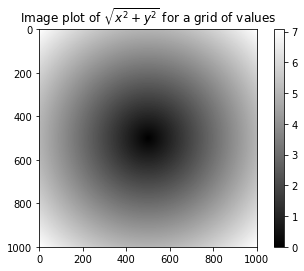

In [77]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.draw()

### Expressing conditional logic as array operations

The **numpy.where** function is a vectorized version of the ternary expression **x if condition else y**. Suppose we had a boolean array and two arrays of values:

In [61]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from **xarr** whenever the corresponding value in
**cond** is **True** otherwise take the value from **yarr** . A list comprehension doing this might
look like:

In [62]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all
the work is being done in pure Python). Secondly, it will not work with multidimensional arrays. With **np.where** you can write this very concisely:

In [63]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to **np.where** don’t need to be arrays; one or both of
them can be scalars. A typical use of **where** in data analysis is to produce a new array of
values based on another array. Suppose you had a matrix of randomly generated data
and you wanted to replace all positive values with 2 and all negative values with -2.
This is very easy to do with **np.where** :

In [64]:
arr = randn(4, 4)
print(arr)
print(np.where(arr > 0, 2, -2))
print(np.where(arr > 0, 2, arr)) # set only positive values to 2

[[-0.3887  0.9294  1.139  -0.9523]
 [ 2.6987 -0.7275 -1.0822 -0.1712]
 [-1.0149  0.873  -1.9685  2.1074]
 [-0.5551 -1.1543  1.0359 -0.255 ]]
[[-2  2  2 -2]
 [ 2 -2 -2 -2]
 [-2  2 -2  2]
 [-2 -2  2 -2]]
[[-0.3887  2.      2.     -0.9523]
 [ 2.     -0.7275 -1.0822 -0.1712]
 [-1.0149  2.     -1.9685  2.    ]
 [-0.5551 -1.1543  2.     -0.255 ]]


The arrays passed to **where** can be more than just equal sizes array or scalers.
With some cleverness you can use **where** to express more complicated logic; consider
this example where I have two boolean arrays, **cond1** and **cond2** , and wish to assign a
different value for each of the 4 possible pairs of boolean values:

In [78]:
# Not to be executed
n=10
result = []
for i in range(n):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)

While perhaps not immediately obvious, this **for** loop can be converted into a nested
**where** expression:

In [79]:
# Not to be executed

np.where(cond1 & cond2, 0,
         np.where(cond1, 1,
                  np.where(cond2, 2, 3)))

In this particular example, we can also take advantage of the fact that boolean values
are treated as 0 or 1 in calculations, so this could alternatively be expressed (though a
bit more cryptically) as an arithmetic operation:

In [80]:
# Not to be executed

result = 1 * cond1 + 2 * cond2 + 3 * -(cond1 | cond2)

### Mathematical and statistical methods

A set of mathematical functions which compute statistics about an entire array or about
the data along an axis are accessible as array methods. Aggregations (often called
*reductions*) like **sum , mean** , and standard deviation **std** can either be used by calling the
array instance method or using the top level NumPy function:

In [81]:
arr = np.random.randn(5, 4) # normally-distributed data
print(arr.mean())
print(np.mean(arr))
print(arr.sum())

-0.04213787487582761
-0.04213787487582761
-0.8427574975165522


Functions like **mean** and **sum** take an optional axis argument which computes the statistic
over the given axis, resulting in an array with one fewer dimension:

In [82]:
print(arr.mean(axis=1))
print(arr.sum(0))

[ 0.6485 -0.0153 -0.6633 -0.3151  0.1346]
[ 1.6922 -1.1998 -0.9235 -0.4117]


Other methods like **cumsum** and **cumprod** do not aggregate, instead producing an array
of the intermediate results:

In [83]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr.cumsum(0))
print(arr.cumprod(1))

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


Method | Description
--- | ---
sum | Sum of all the elements in the array or along an axis. Zero-length arrays have sum 0.
mean | Arithmetic mean. Zero-length arrays have NaN mean.
std, var | Standard deviation and variance, respectively, with optional degrees of freedom adjustment (default denominator n ).
min, max | Minimum and maximum.
argmin, argmax | Indices of minimum and maximum elements, respectively.
cumsum | Cumulative sum of elements starting from 0
cumprod | Cumulative product of elements starting from 1

### Methods for boolean arrays

Boolean values are coerced to 1 ( **True** ) and 0 ( **False** ) in the above methods. Thus, **sum**
is often used as a means of counting **True** values in a boolean array:

In [85]:
arr = randn(100)
(arr > 0).sum() # Number of positive values

56

There are two additional methods, **any** and **all** , useful especially for boolean arrays.
**any** tests whether one or more values in an array is **True** , while **all** checks if every value
is **True** :

In [84]:
bools = np.array([False, False, True, False])
print(bools.any())
print(bools.all())

True
False


These methods also work with non-boolean arrays, where non-zero elements evaluate
to **True** .

### Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in-place using the **sort**
method:

In [86]:
arr = randn(8)
print(arr)
arr.sort()
print(arr)

[-0.752  -0.1051  0.286  -0.1419  0.1281 -0.6543  0.2868  0.221 ]
[-0.752  -0.6543 -0.1419 -0.1051  0.1281  0.221   0.286   0.2868]


Multidimensional arrays can have each 1D section of values sorted in-place along an
axis by passing the axis number to **sort** :

In [87]:
arr = randn(5, 3)
print(arr)
arr.sort(1)
print(arr)

[[ 1.2153  1.1476 -0.5674]
 [-0.6495 -1.0713  1.2761]
 [-0.4671  0.1542  0.932 ]
 [-0.2061 -0.8558  0.7906]
 [-1.0109  0.1597 -0.9276]]
[[-0.5674  1.1476  1.2153]
 [-1.0713 -0.6495  1.2761]
 [-0.4671  0.1542  0.932 ]
 [-0.8558 -0.2061  0.7906]
 [-1.0109 -0.9276  0.1597]]


The top level method **np.sort** returns a sorted copy of an array instead of modifying
the array in place. A quick-and-dirty way to compute the quantiles of an array is to sort
it and select the value at a particular rank:

In [88]:
large_arr = randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.587070520915247

### Unique and other set logic

NumPy has some basic set operations for one-dimensional ndarrays. Probably the most
commonly used one is **np.unique** , which returns the sorted unique values in an array:

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
print(np.unique(ints))

Contrast **np.unique** with the pure Python alternative:

In [ ]:
sorted(set(names))

Another function, **np.in1d** , tests membership of the values in one array in another,
returning a boolean array:

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

Method | Description
--- | ---
unique(x) | Compute the sorted, unique elements in x
intersect1d(x, y) | Compute the sorted, common elements in x and y
union1d(x, y) | Compute the sorted union of elements
in1d(x, y) | Compute a boolean array indicating whether each element of x is contained in y
setdiff1d(x, y) | Set difference, elements in x that are not in y
setxor1d(x, y) | Set symmetric differences; elements that are in either of the arrays, but not both

## File input and output with arrays

NumPy is able to save and load data to and from disk either in text or binary format.
In later chapters you will learn about tools in pandas for reading tabular data into
memory.

### Storing arrays on disk in binary format

**np.save** and **np.load** are the two workhorse functions for efficiently saving and loading
array data on disk. Arrays are saved by default in an uncompressed raw binary format
with file extension **.npy** .

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

If the file path does not already end in **.npy** , the extension will be appended. The array
on disk can then be loaded using **np.load** :

In [ ]:
np.load('some_array.npy')

You save multiple arrays in a zip archive using np.savez and passing the arrays as keyword arguments:

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

When loading an **.npz** file, you get back a dict-like object which loads the individual
arrays lazily:

In [ ]:
arch = np.load('array_archive.npz')
arch['b']

In [ ]:
!rm some_array.npy
!rm array_archive.npz

### Saving and loading text files

Loading text from files is a fairly standard task. The landscape of file reading and writing
functions in Python can be a bit confusing for a newcomer, so I will focus mainly on
the **read_csv** and **read_table** functions in pandas. It will at times be useful to load data
into vanilla NumPy arrays using **np.loadtxt** or the more specialized **np.genfromtxt** .

These functions have many options allowing you to specify different delimiters, converter functions for certain columns, skipping rows, and other things. Take a simple
case of a comma-separated file (CSV) like this:

In [89]:
!cat array_ex.txt

0.580052,0.186730,1.040717,1.134411
0.194163,-0.636917,-0.938659,0.124094
-0.126410,0.268607,-0.695724,0.047428
-1.484413,0.004176,-0.744203,0.005487
2.302869,0.200131,1.670238,-1.881090
-0.193230,1.047233,0.482803,0.960334


This can be loaded into a 2D array like so:

In [90]:
arr = np.loadtxt('array_ex.txt', delimiter=',')
arr

array([[ 0.5801,  0.1867,  1.0407,  1.1344],
       [ 0.1942, -0.6369, -0.9387,  0.1241],
       [-0.1264,  0.2686, -0.6957,  0.0474],
       [-1.4844,  0.0042, -0.7442,  0.0055],
       [ 2.3029,  0.2001,  1.6702, -1.8811],
       [-0.1932,  1.0472,  0.4828,  0.9603]])

**np.savetxt** performs the inverse operation: writing an array to a delimited text file.
**genfromtxt** is similar to loadtxt but is geared for structured arrays and missing data
handling

## Linear algebra

Linear algebra, like matrix multiplication, decompositions, determinants, and other
square matrix math, is an important part of any array library. Unlike some languages
like MATLAB, multiplying two two-dimensional arrays with * is an element-wise
product instead of a matrix dot product. As such, there is a function dot , both an array
method, and a function in the numpy namespace, for matrix multiplication:

In [91]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)
print(x.dot(y))  # equivalently np.dot(x, y)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]
[[ 28.  64.]
 [ 67. 181.]]


A matrix product between a 2D array and a suitably sized 1D array results in a 1D array:

In [ ]:
np.dot(x, np.ones(3))

**numpy.linalg** has a standard set of matrix decompositions and things like inverse and
determinant. These are implemented under the hood using the same industry-standard
Fortran libraries used in other languages like MATLAB and R, such as like BLAS, LA-
PACK, or possibly (depending on your NumPy build) the Intel MKL:

In [ ]:
np.random.seed(12345)

In [ ]:
from numpy.linalg import inv, qr
X = randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
print(r)

Function | Description
--- | ---
diag | Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal
dot | Matrix multiplication
trace | Compute the sum of the diagonal elements
det | Compute the matrix determinant
eig | Compute the eigenvalues and eigenvectors of a square matrix
inv | Compute the inverse of a square matrix
pinv | Compute the Moore-Penrose pseudo-inverse inverse of a square matrix
qr | Compute the QR decomposition
svd | Compute the singular value decomposition (SVD)
solve | Solve the linear system Ax = b for x, where A is a square matrix
lstsq | Compute the least-squares solution to y = Xb

## Random number generation

The numpy.random module supplements the built-in Python random with functions for
efficiently generating whole arrays of sample values from many kinds of probability distributions. For example, you can get a 4 by 4 array of samples from the standard
normal distribution using **normal** :

In [ ]:
samples = np.random.normal(size=(4, 4))
samples

Python’s built-in random module, by contrast, only samples one value at a time. As you
can see from this benchmark, numpy.random is well over an order of magnitude faster
for generating very large samples:

In [ ]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in xrange(N)]
%timeit np.random.normal(size=N)

Function | Description
--- | ---
seed | Seed the random number generator
permutation | Return a random permutation of a sequence, or return a permuted range
shuffle | Randomly permute a sequence in place
rand | Draw samples from a uniform distribution
randint | Draw random integers from a given low-to-high range
randn | Draw samples from a normal distribution with mean 0 and standard deviation 1 (MATLAB-like interface)
binomial | Draw samples a binomial distribution
normal | Draw samples from a normal (Gaussian) distribution
beta | Draw samples from a beta distribution
chisquare | Draw samples from a chi-square distribution
gamma | Draw samples from a gamma distribution
uniform | Draw samples from a uniform [0, 1) distribution

## Example: Random Walks

An illustrative application of utilizing array operations is in the simulation of random
walks. Let’s first consider a simple random walk starting at 0 with steps of 1 and -1
occurring with equal probability. A pure Python way to implement a single random
walk with 1,000 steps using the built-in random module:

In [ ]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [ ]:
np.random.seed(12345)

You might make the observation that walk is simply the cumulative sum of the random
steps and could be evaluated as an array expression. Thus, I use the np.random module
to draw 1,000 coin flips at once, set these to 1 and -1, and compute the cumulative sum:

In [ ]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

From this we can begin to extract statistics like the minimum and maximum value along
the walk’s trajectory:

In [ ]:
print(walk.min())
print(walk.max())

A more complicated statistic is the first crossing time, the step at which the random
walk reaches a particular value. Here we might want to know how long it took the
random walk to get at least 10 steps away from the origin 0 in either direction.
np.abs(walk) >= 10 gives us a boolean array indicating where the walk has reached or
exceeded 10, but we want the index of the first 10 or -10. Turns out this can be computed using argmax , which returns the first index of the maximum value in the boolean
array ( True is the maximum value):

In [ ]:
(np.abs(walk) >= 10).argmax()

Note that using argmax here is not always efficient because it always makes a full scan
of the array. In this special case once a True is observed we know it to be the maximum
value.

### Simulating many random walks at once

If your goal was to simulate many random walks, say 5,000 of them, you can generate
all of the random walks with minor modifications to the above code. The numpy.ran
dom functions if passed a 2-tuple will generate a 2D array of draws, and we can compute
the cumulative sum across the rows to compute all 5,000 random walks in one shot:

In [ ]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

Now, we can compute the maximum and minimum values obtained over all of the
walks:

In [ ]:
print(walks.max())
print(walks.min())

Out of these walks, let’s compute the minimum crossing time to 30 or -30. This is
slightly tricky because not all 5,000 of them reach 30. We can check this using the
any method:

In [ ]:
hits30 = (np.abs(walks) >= 30).any(1)
print(hits30)
print(hits30.sum()) # Number that hit 30 or -30

We can use this boolean array to select out the rows of walks that actually cross the
absolute 30 level and call argmax across axis 1 to get the crossing times:

In [ ]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
print(crossing_times.mean())

Feel free to experiment with other distributions for the steps other than equal sized
coin flips. You need only use a different random number generation function, like
normal to generate normally distributed steps with some mean and standard deviation:

In [ ]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))